<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.


In [1]:
!pip install xlrd==1.2.0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


데이터 살펴보기

In [4]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/프로젝트/보스턴/BostonHousing.xls')
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,0
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,0


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

# 데이터 타입과 결측값 확인하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


# 데이터 분포 확인하기

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


주택가격 (`MEDV`)과 관련 있는 Factor를 찾아보세요

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

In [ ]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


## Heatmap으로 시각화하여 상관계수 용이하게 파악

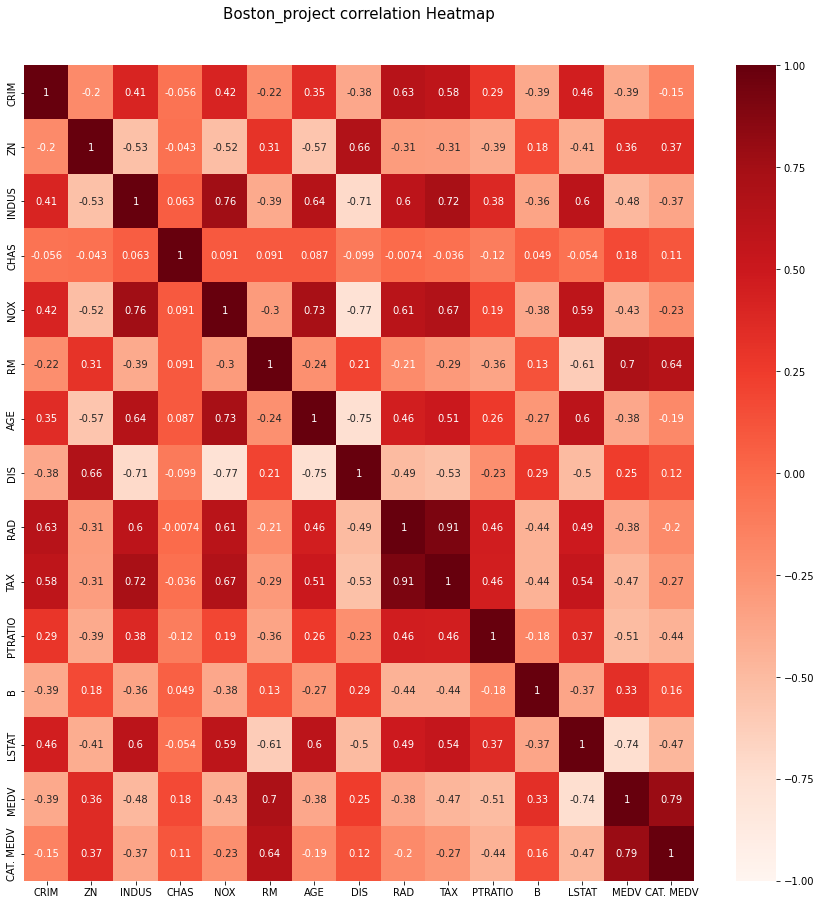

In [ ]:
# Heatmap으로 시각화하여 상관계수 용이하게 파악

heatmap_data = df[df.columns]
plt.figure(figsize=(15, 15))
plt.title("Boston_project correlation Heatmap", y = 1.05, size = 15)
sns.heatmap(heatmap_data.corr(), cmap = "Reds", vmin = -1, vmax=1, annot = True)

In [5]:
corr_bs = df.corr() # 상관계수를 새로운 DataFrame으로 저장(변수명 : corr_bs)
abs(corr_bs)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,0.200469,0.406583,0.055892,0.420972,0.219247,0.352734,0.379670,0.625505,0.582764,0.289946,0.385064,0.455621,0.388305,0.151987
ZN,0.200469,1.000000,0.533828,0.042697,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.175520,0.412995,0.360445,0.365296
INDUS,0.406583,0.533828,1.000000,0.062938,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800,0.483725,0.366276
CHAS,0.055892,0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,0.099176,0.007368,0.035587,0.121515,0.048788,0.053929,0.175260,0.108631
NOX,0.420972,0.516604,0.763651,0.091203,1.000000,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879,0.427321,0.232502
RM,0.219247,0.311991,0.391676,0.091251,0.302188,1.000000,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808,0.695360,0.641265
AGE,0.352734,0.569537,0.644779,0.086518,0.731470,0.240265,1.000000,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339,0.376955,0.191196
DIS,0.379670,0.664408,0.708027,0.099176,0.769230,0.205246,0.747881,1.000000,0.494588,0.534432,0.232471,0.291512,0.496996,0.249929,0.118887
RAD,0.625505,0.311948,0.595129,0.007368,0.611441,0.209847,0.456022,0.494588,1.000000,0.910228,0.464741,0.444413,0.488676,0.381626,0.197924
TAX,0.582764,0.314563,0.720760,0.035587,0.668023,0.292048,0.506456,0.534432,0.910228,1.000000,0.460853,0.441808,0.543993,0.468536,0.273687


In [14]:
 # MEDV와 상관계수 확인

se = corr_bs.loc["MEDV"]
 
type(se)

pandas.core.series.Series

In [15]:
cond1 = ( ( se.abs() >= 0.6) & (se != 1) ) # 유의미한 상관계수의 기준은 0.6 이상으로 함
se.loc[cond1]

RM           0.695360
LSTAT       -0.737663
CAT. MEDV    0.789789
Name: MEDV, dtype: float64

In [12]:
# Target 값인 'MEDV'는 상관계수가 1이 나오므로, '행'에서 슬라이싱해서 제외
df.corr().loc[:'LSTAT','MEDV'].abs().sort_values(ascending = False) 

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

# MEDV(집값)은 RM(방의 수, 0.695), LSTAT(하위 계층 비율,-0.737)와 상관관계가 큼
 일차적으로 분석해보면, 


1.   집의 Spec을 나타내는 ZN, CHAS(찰스강 조망권), RM(방의 수), AGE(신축여부) 중에서 RM이 유의미한 팩터
2.   주거군집(residential clustering)을 보여주는 지표인 CRIM(범죄율), B(흑인 비율), LSTAT(하위 계층 비율)에서는 LSTAT가 유의미한 팩터


## 시각화

### '방의 갯수'와 '집값'의 산포도 

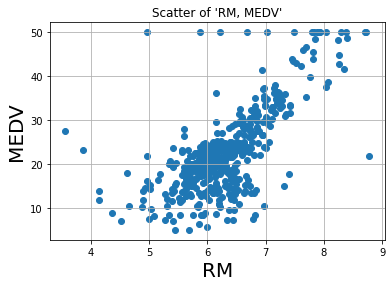

In [ ]:
# MEDV와 RM의 Scatter

font_size = 20

plt.scatter(df['RM'],df['MEDV'])
plt.grid()
plt.xlabel("RM", fontsize = font_size)
plt.ylabel("MEDV", fontsize = font_size)
plt.title("Scatter of 'RM, MEDV'")
plt.show()

In [ ]:
df['RM'].shape

(506,)

In [ ]:
df['RM']

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

### '하위 계층 비율'과 '집값'의 산포도 

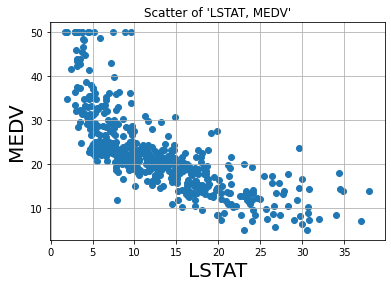

In [ ]:
# MEDV와 LSTAT의 Scatter

plt.scatter(df['LSTAT'],df['MEDV'])
plt.grid()
plt.xlabel("LSTAT", fontsize = font_size)
plt.ylabel("MEDV", fontsize = font_size)
plt.title("Scatter of 'LSTAT, MEDV'")
plt.show()

### '방의 갯수'와 집값 간의 단순회귀모형

In [ ]:
# 두 팩터(RM와 LSTAT)와 집값의 관계를 각각 단순선형회귀분석 해보기

lr = LinearRegression()
x1 = df['RM'].values
y = df['MEDV'].values
x1 = x1.reshape(-1,1)
y = y.reshape(-1,1)

In [ ]:
x1.shape

(506, 1)

In [ ]:
lr1 = lr.fit(x1,y)

In [ ]:
print(lr1.coef_[0])
print(lr1.intercept_)
a1 = lr1.coef_[0]
b1 = lr1.intercept_
y1 = a1 * x1 + b1

[9.10210898]
[-34.67062078]


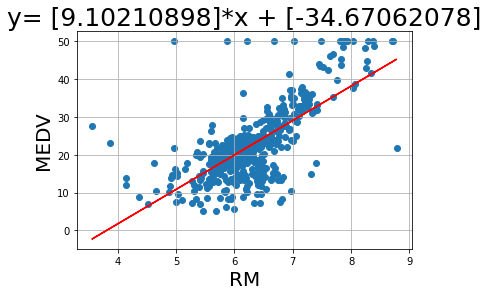

In [ ]:
plt.scatter(df['RM'],df['MEDV'])
plt.grid()
plt.plot(x1, y1, color = 'red')
plt.xlabel("RM", fontsize = font_size)
plt.ylabel("MEDV", fontsize = font_size)
plt.title(f'y= {lr1.coef_[0]}*x + {lr1.intercept_}',fontsize = 25)
plt.show()

### '하위 계층 비율'과 집값 간의 단순회귀모형

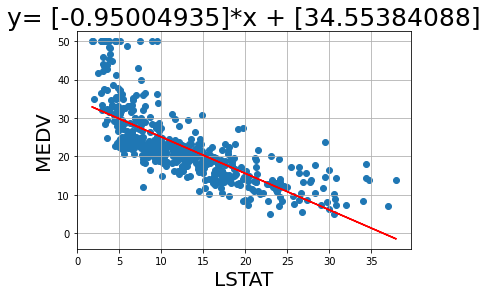

In [ ]:
x2 = df['LSTAT'].values
x2 = x2.reshape(-1,1)
lr2 = lr.fit(x2,y)

a2 = lr2.coef_[0]
b2 = lr2.intercept_
y2 = a2 * x2 + b2

plt.scatter(df['LSTAT'],df['MEDV'])
plt.grid()
plt.plot(x2, y2, color = 'red')
plt.xlabel("LSTAT", fontsize = font_size)
plt.ylabel("MEDV", fontsize = font_size)
plt.title(f'y= {lr2.coef_[0]}*x + {lr2.intercept_}',fontsize = 25)
plt.show()

# 번외

## 대형 평수와 소형 평수의 집값 비교

               MEDV
Dummy_ZN           
high      28.250000
low       20.473387


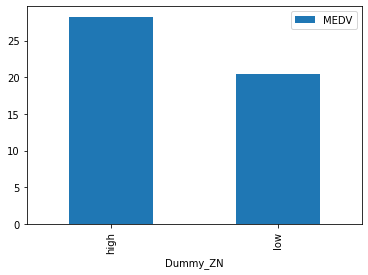

In [ ]:
# 번외1) 대형 평수와 소형 평수의 집값 비교

df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/보스턴_프로젝트/BostonHousing.xls')

me_zn = df2['ZN'].mean()
def f(x): # '평수의 평균'을 기준으로 대소 labeling
    if x >= me_zn :
        return "high"
    else:
        return "low"

df2['Dummy_ZN'] = df2['ZN'].map(f)


how = {
    "MEDV" : np.mean
}
z = df2.groupby('Dummy_ZN').agg(how)
print(z)
z.plot.bar() # 'high'와 'low'의 평균 비교

## 찰스강 여부(Dummy 변수) 집값 평균 비교

           MEDV
CHAS           
0     22.093843
1     28.440000


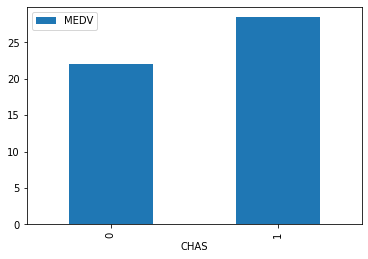

In [ ]:
# 번외2) 찰스강 여부(Dummy 변수) 집값 평균 비교

how = {
    "MEDV" : np.mean
}
y = df2.groupby('CHAS').agg(how)

print(y)
y.plot.bar()

# 결론

1.   집의 Spec적 요소에서 찰스강을 조망할 수 있는 집이 평균으로 약 28% 높은 집값을 보였으며, 평수가 높은 구역이 평균적으로 약 37% 높은 집값을 보였다.
2.   기존에 예상했던 B(흑인 비율)과 집값의 상관관계는 0.33으로 유의미한 기준으로 설정한 0.6에 미치지 못했다. 이는 주거군집(residential clustering) 관점에서 인종차별적 요소보다 소득차이가 집값에 큰 의미를 미치는 걸로 보여진다.
3.   단순회귀모형으로 보았을 때, RM(방의 수)가 1만큼 증가할 시에, MEDV(집값)은 약 9.1 정도 증가하며, LSTAT(하위 계층 비율)이 1만큼 증가할 시에, MEDV은 약 0.95만큼 감소한다.




